<a href="https://colab.research.google.com/github/A01793509/Equipo38/blob/main/Arboldedecision_Equipo38(1%2C2%2C3%2C4%2C5)(2022-10-22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Alberto Jose Garcia Porras (A01793509)
*   Carlos Julio León Caicedo (A01793947)
*   Luis Fernando Ríos Piedra (A00453954)
*   Marco Antonio Vázquez Morales (A01793704)
*   Nicolás Emmanuel Juárez Valenzuela (A01325071)


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests, zipfile
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from yellowbrick.model_selection import ValidationCurve
#from sklearn.model_selection import validation_curve
from io import BytesIO

#**Ejercicio-1.** 

In [2]:
#A continuación cargaremos los datos del ejercicio. En este caso descargamos el archivo 'SouthGermanCredit.asc' desde el repositorio indicado y lo cargamos 
#en la carpeta 'Actividad7' de nuestro repositorio local. Teniendo en cuenta que el archivo viene con separación por espacios, debemos indicar el parámetro 
#'sep=" "' para que lo formatee correctamente.
#df = pd.read_csv("/content/Actividad7/SouthGermanCredit.asc", sep=" ")

#df.head()

#Este metodo es para poder leer directametne desde el zip y directamente de la URL donde esta la zip sin descargar nada

#Defining the zip file URL
ruta = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00522/SouthGermanCredit.zip'

# Split URL to get the file name
archivo = ruta.split('/')[-1]

req = requests.get(ruta)

# extracting the zip file contents
archivo_zip= zipfile.ZipFile(BytesIO(req.content))
archivo_zip.extractall('/content/sample_data/SouthGermanCredit')
df = pd.read_csv("/content/sample_data/SouthGermanCredit/SouthGermanCredit.asc",sep=' ')

df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
#Una vez cargados los datos en nuestro dataframe, procedemos a cambiar el nombre de las columnas realizando la traducción respectiva de acuerdo a lo indicado 
#en la descripción del dataset. En este caso asignaremos a la lista 'cols_ingles' el nombre que queremos darle a cada columna en el respectivo orden.
cols_ingles = ["status", "duration", "credit_history", "purpose", "amount", "savings", "employment_duration", "installment_rate", "personal_status_sex", 
               "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", 
               "telephone", "foreign_worker", "credit_risk"]

#cols_espanol = ["estado", "duracion", "historial_crediticio", "proposito", "monto", "ahorros", "duracion_empleo", "valor_cuota", "estado_personal_sexo", 
#               "otros_deudores", "residencia_actual", "propiedad", "edad", "otros_planes_financiacion", "casa", "numero_de_creditos", "cargo", 
#               "persona_confiable", "telefono", "trabajador_extranjero", "riesgo_credito"]

#Renombramos las columnas asignando la lista con los nombres a la propiedad columns del dataframe
df.columns=cols_ingles
#df.columns=cols_espanol

df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#**Ejercicio-2.**

In [4]:
#Definimos los atributos de entrada como 'X' y a la variable de salida como 'Y'
X=df.drop('credit_risk',axis=1)

Y=df['credit_risk']


In [93]:
#Particionamos nuestros datos en conjunto de entrenamiento y conjunto de pruebas, ya que no requerimos validación debido al método de validación cruzada que
#utilizaremos. El conjunto de entrenamiento corresponderá al 85% de los datos.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=0.85)

Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 735 to 455
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   850 non-null    int64
 1   duration                 850 non-null    int64
 2   credit_history           850 non-null    int64
 3   purpose                  850 non-null    int64
 4   amount                   850 non-null    int64
 5   savings                  850 non-null    int64
 6   employment_duration      850 non-null    int64
 7   installment_rate         850 non-null    int64
 8   personal_status_sex      850 non-null    int64
 9   other_debtors            850 non-null    int64
 10  present_residence        850 non-null    int64
 11  property                 850 non-null    int64
 12  age                      850 non-null    int64
 13  other_installment_plans  850 non-null    int64
 14  housing                  850 non-null    int64
 15  numb

In [6]:
Xtrain.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.600000,20.972941,2.512941,2.904706,3306.798824,2.095294,3.395294,2.975294,2.696471,1.140000,2.831765,2.363529,35.588235,2.681176,1.931765,1.407059,2.903529,1.845882,1.414118,1.964706
std,1.255377,12.054176,1.072385,2.769360,2879.766234,1.587377,1.200305,1.117629,0.701412,0.468489,1.095522,1.055955,11.361388,0.700495,0.531729,0.583598,0.662018,0.361274,0.492859,0.184631
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1364.500000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2317.000000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,3975.250000,3.000000,5.000000,4.000000,3.000000,1.000000,4.000000,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,60.000000,4.000000,10.000000,18424.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


#**Ejercicio-3.**

In [94]:
#**********************************************************************************************************************************************************************
#Creamos los pipelines para la imputación, la transformación (escalar) de las variables numéricas y para la transformación One-hot de las variables
#categóricas y binarias:
#**********************************************************************************************************************************************************************
#Almacenamos las variables numéricas en una lista para mayor facilidad en su uso
XNumericas=["age", "amount", "duration"]
#Creamos el pipeline para las numéricas con la imputación utilizando la media y el minmax para escalar los datos numéricos a un rango equiparable
pipeline_numericas = Pipeline(steps = [('impMedia', SimpleImputer(strategy='mean')),('scalar', MinMaxScaler(feature_range=(1,2)))])
#pipeline_numericas = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),('scalar', MinMaxScaler(feature_range=(1,2)))])

#Almacenamos las variables categóricas y ordinales en una lista para mayor facilidad en su uso
XCategoricas=["status","credit_history", "purpose", "savings", "personal_status_sex", "other_debtors",
                                                               "other_installment_plans", "housing"]
#Creamos el pipeline para las categóricas con la imputación utilizando la moda y aplicando la transformación One-Hot
pipeline_categoricas = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first', handle_unknown='ignore'))])

#Almacenamos las variables binarias en una lista para mayor facilidad en su uso
XBinarias = ["people_liable", "telephone", "foreign_worker"]
#Creamos el pipeline para las categóricas con la imputación utilizando la moda y aplicando la transformación One-Hot
pipeline_binarias = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first', handle_unknown='ignore'))])


In [95]:
#Establecemos a "Columnas_Transformar" como la variable para transformar todas las columnas definidas en el punto anterior, llamando los pipeline creados previamente.
Columnas_Transformar = ColumnTransformer(transformers=[('numericas', pipeline_numericas,XNumericas), ('categoricas', pipeline_categoricas, XCategoricas), 
                                                     ('binarias', pipeline_binarias, XBinarias)], remainder='passthrough')
#Aplicamos la transformación de las columnas requeridas (numéricas, categóricas y binarias solamente)
#X_train_fit = Columnas_Transformar.fit(Xtrain)
#pd.DataFrame(X_train_fit.transform(Xtrain))

#**Ejercicio-4.**

In [96]:
#Creamos la función obtener_modelos para utilizarla durante el procesamiento de los datos
def obtener_modelos():
  #Creamos las listas en blanco para almacenar los modelos a utilizar y los nombres de cada modelo
  modelos = list()
  nombres = list()

  #Creamos el registro del modelo de regresión logística en las listas modelo y nombres
  modelos.append(LogisticRegression(max_iter=3000))
  nombres.append('LR')

  #Creamos el registro del modelo de árbol de decisión en las listas modelo y nombres
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')

  #Creamos el registro de Random Forest en las listas modelo y nombres
  modelos.append(RandomForestClassifier())
  nombres.append('RF')
  
  #Devolvemos las listas creadas para el procesamiento respectivo
  return modelos, nombres

In [97]:
#Definimos nuestras funciones de cálculo del score para cada una de las opciones requeridas
#Función para cálculo de accuracy
def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

#Función para cálculo de precisión
def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal,ypred).ravel()
  precision = tp/(tp+fp)
  return precision

#Función para cálculo de recall
def mi_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal,ypred).ravel()
  recall = tp/(tp+fn)
  return recall

#Función para cálculo de f1 score
def mi_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  f1score = (2*tp)/((2*tp)*fp+fn)
  return f1score

#Función para cálculo de gmean
def mi_gmean(yreal, ypred):
    tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    gmean=np.sqrt(recall*precision)
    return gmean

In [101]:
#A continuación generamos la validación cruzada para los modelos almacenados en las listas previas e imprimimos las métricas para los
#conjuntos de entrenamiento y validación.

#Se agrega temporalmente para eliminar el warning de división por cero
import warnings
warnings.filterwarnings("ignore")

#Captamos en las variables modelos y nombres, los modelos y descripciones almacenadas en las listas, llamando la función creada previamente.
modelos, nombres = obtener_modelos()

#Creamos una lista en blanco para almacenar el resultado de la iteración
resultados = list()

#Comenzamos a recorrer todos los modelos almacenados en la lista modelos
for i in range(len(modelos)):

  #Definimos los K pliegues que utilizaremos en nuestra validación cruzada, en este caso, 5 divisiones y 3 repeticiones
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  #Creamos nuestro pipeline con los pasos de transformación y ejecución de los modelos
  pipeline = Pipeline(steps=[("ct", Columnas_Transformar), ("m", modelos[i])])

  #Almacenamos las métricas a utilizar en la lista 'mismetricas' y llamamos las funciones de métricas creadas previamente
  mismetricas = {
      "accuracy": make_scorer(mi_accuracy),
      "precision": make_scorer(mi_precision),
      "recall": make_scorer(mi_recall),
      "f1score": make_scorer(mi_f1score),
      "gmean": make_scorer(mi_gmean)

  }

  #Ejecutamos la validación cruzada y almacenamos el resultado en la variable 'resultadosOU'
  resultadosOU = cross_validate(pipeline, Xtrain, Ytrain, scoring=mismetricas, cv=kfold,  
                                return_train_score=True
                                )
  resultados.append(resultadosOU)

  print("Métricas de %s para los datos de entrenamiento:" %nombres[i])
  print("\nmean Accuracy: %.3f \nmean Precision: %.3f \nmean Recall: %.3f \nmean f1score: %.3f \nGmean : %.3f \n" % (
                                               np.mean(resultadosOU["train_accuracy"]),
                                               np.mean(resultadosOU["train_precision"]),
                                               np.mean(resultadosOU["train_recall"]),
                                              np.mean(resultadosOU["train_f1score"]),
                                               np.mean(resultadosOU["train_gmean"])
  ))                  

  print("Métricas de %s para los datos de validación:" %nombres[i])
  print("\nmean Accuracy: %.3f \nmean Precision: %.3f \nmean Recall: %.3f \nmean f1score: %.3f \nGmean : %.3f \n" % (
                                               np.mean(resultadosOU["test_accuracy"]),
                                               np.mean(resultadosOU["test_precision"]),
                                               np.mean(resultadosOU["test_recall"]),
                                               np.mean(resultadosOU["test_f1score"]),
                                               np.mean(resultadosOU["test_gmean"])
  ))                                                    

Métricas de LR para los datos de entrenamiento:

mean Accuracy: 0.792 
mean Precision: 0.817 
mean Recall: 0.903 
mean f1score: 0.010 
Gmean : 0.859 

Métricas de LR para los datos de validación:

mean Accuracy: 0.755 
mean Precision: 0.797 
mean Recall: 0.870 
mean f1score: 0.039 
Gmean : 0.833 

Métricas de DT para los datos de entrenamiento:

mean Accuracy: 1.000 
mean Precision: 1.000 
mean Recall: 1.000 
mean f1score: inf 
Gmean : 1.000 

Métricas de DT para los datos de validación:

mean Accuracy: 0.700 
mean Precision: 0.792 
mean Recall: 0.773 
mean f1score: 0.043 
Gmean : 0.782 

Métricas de RF para los datos de entrenamiento:

mean Accuracy: 1.000 
mean Precision: 1.000 
mean Recall: 1.000 
mean f1score: inf 
Gmean : 1.000 

Métricas de RF para los datos de validación:

mean Accuracy: 0.741 
mean Precision: 0.772 
mean Recall: 0.891 
mean f1score: 0.032 
Gmean : 0.829 



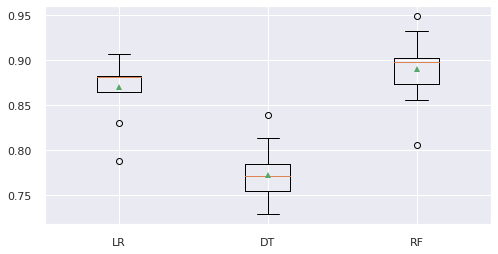

In [102]:
#Se generan los boxplots de los tres modelos utilizando solo la métrica 'recall'
sns.set(rc={'figure.figsize':(8,4)})
bprecall = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bprecall.append(rr)
plt.boxplot(bprecall, labels=nombres, showmeans=True)
plt.show()

✍ A través de los diagramas de caja y bigote podemos determinar que para DT y RF no se visualiza una variación alta en el conjunto de datos, por ende no podríamos determinar si el conjunto está sobreentrenado o subentrenado con estos modelos, por otra parte, para LR, vemos una alta varianza y un sesgo negativo, lo que nos da a entender que el conjunto de datos podría estar sobreentrenado, sin embargo, procederemos a graficar las curvas de aprendizaje para una mejor definición de estos conceptos en el entrenamiento de los modelos.

In [108]:
def mi_PlotCurvaAprendizaje(ModeloTipo, train_sizes, train_scores, val_scores, TipoImpresion):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    if TipoImpresion=="Incremental":
      plt.title('Curvas de Aprendizaje incremental')
      plt.xlabel('Tamaño del conjunto de entrenamiento')
    else:
      plt.title('Curvas de Aprendizaje')
      plt.xlabel('Tamaño del conjunto de entrenamiento')

    #Si es Random Forrest utilizamos la métrica recall, para los otros utilizamos la métrica F1 score
    if ModeloTipo=="RF":
      plt.ylabel('recall')
    else:
      plt.ylabel('F1 score')

    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [109]:
def mi_CurvaAprendizaje(ModeloTipo, ModeloCurva, Xcurva, ycurva, TipoImpresion):

  MiModelo = ModeloCurva

  ColsX = Columnas_Transformar.fit(Xcurva)
  TransX = ColsX.transform(Xcurva)

  # Ejercicio 2.2: Aplica validación cruzada estratificada y con repeticiones.
  #                Solo define los tres argumentos que se te indicaron.
  # Se espera una línea de código.

  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)


  # Ejercicio 2.3: Genera un arreglo con los 20 valores de los tamaños de muestra:
  # Se espera una línea de código.

  delta_train_sz = np.linspace(0.1, 1.0, 20)


  # Ejercicio 2.4:: Incluye los argumentos que se te indican a la 
  # función learning_curve. Solo sustituye "None" por el valor del
  # argumento adecuado en cada caso.

  if (ModeloTipo == "LR"):
    tr_sizes, tr_scores, val_scores = learning_curve(estimator = MiModelo,    
                                                      X = TransX,
                                                      y = ycurva,
                                                      cv = mi_kfold ,
                                                      train_sizes = delta_train_sz ,
                                                      random_state=0,
                                                      scoring=make_scorer(mi_f1score))
  elif (ModeloTipo == "DT"):
    tr_sizes, tr_scores, val_scores = learning_curve(estimator = MiModelo,    
                                                      X = TransX,
                                                      y = ycurva,
                                                      cv = mi_kfold ,
                                                      train_sizes = delta_train_sz ,
                                                      random_state=0,
                                                      scoring=make_scorer(mi_recall))
  elif (ModeloTipo == "RF"):
    tr_sizes, tr_scores, val_scores = learning_curve(estimator = MiModelo,    
                                                      X = TransX,
                                                      y = ycurva,
                                                      cv = mi_kfold ,
                                                      train_sizes = delta_train_sz ,
                                                      random_state=0,
                                                      scoring=make_scorer(mi_precision))

  # Obtenemos el gráfico con las curvas de aprendizaje:
  mi_PlotCurvaAprendizaje(ModeloTipo, tr_sizes, tr_scores, val_scores, TipoImpresion)

Curvas de aprendizaje del modelo LR


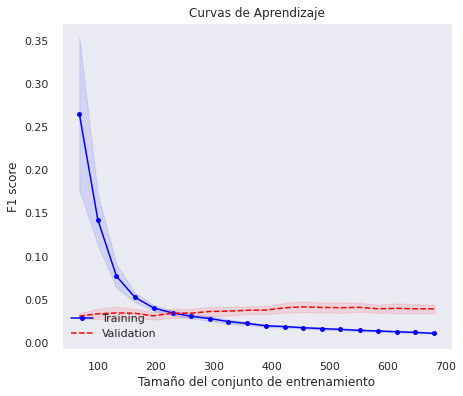

Curvas de aprendizaje del modelo DT


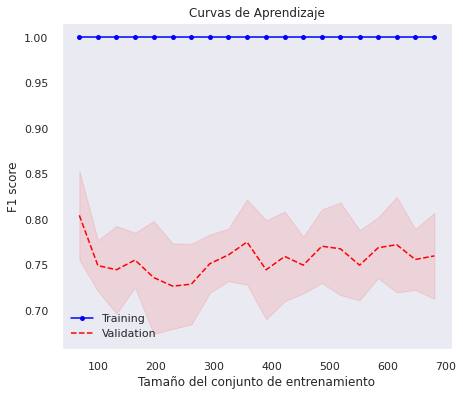

Curvas de aprendizaje del modelo RF


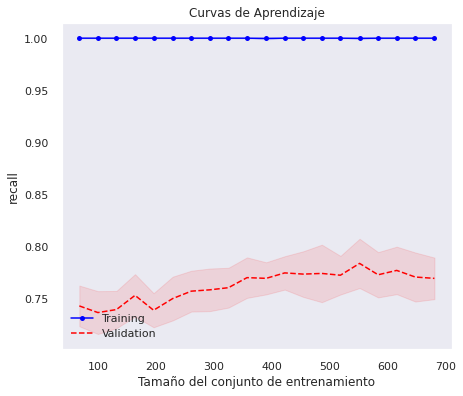

In [110]:
for i in range(len(modelos)):
  print('Curvas de aprendizaje del modelo %s'%nombres[i])
  mi_CurvaAprendizaje(nombres[i], modelos[i], Xtrain, Ytrain, "Normal")

In [61]:
#Curvas de aprendizaje (learning_curve) incrementando tamaño de muestra para modelo de regresión Logística con hiperparámetros.
#for i in range(20):
#    mi_CurvaAprendizaje ("LR", LogisticRegression(max_samples=i),Xtrain,Ytrain)

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 0


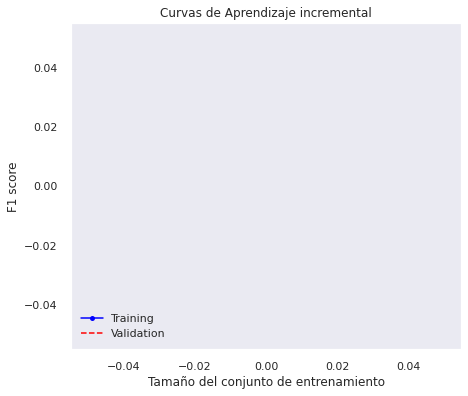

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 1


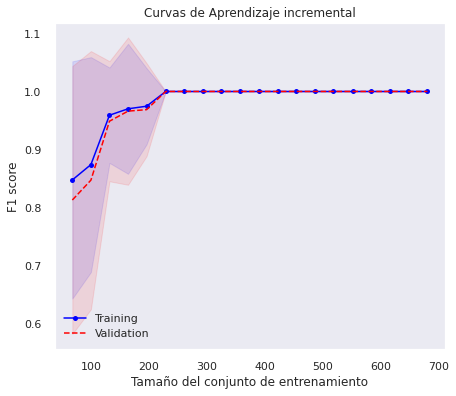

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 2


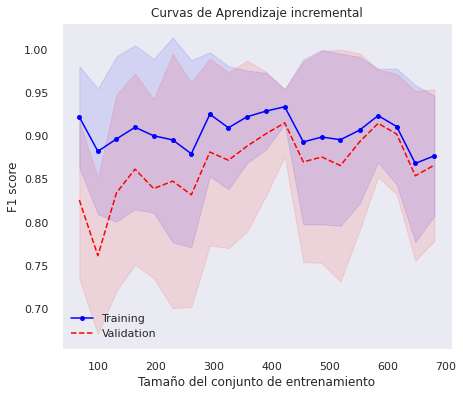

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 3


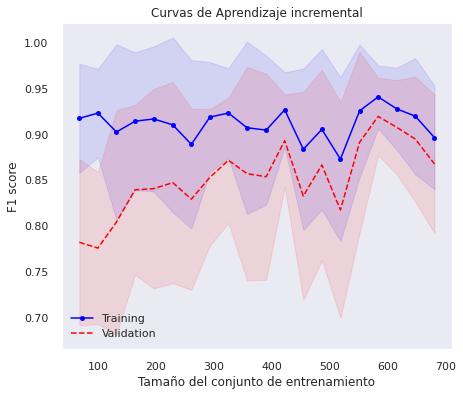

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 4


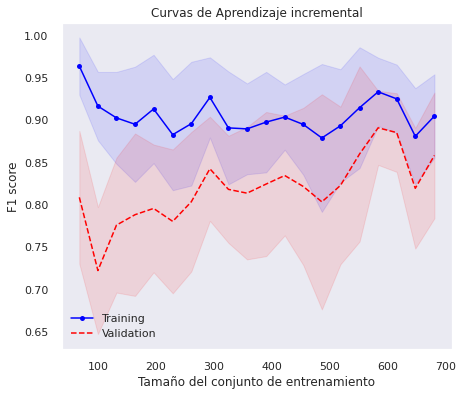

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 5


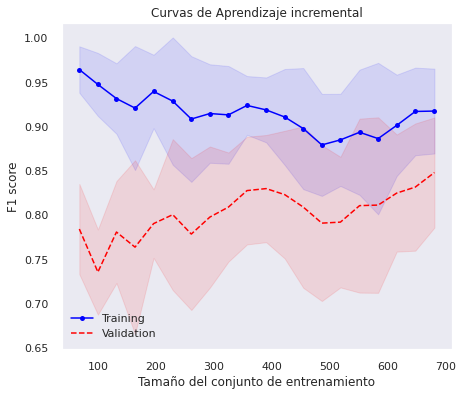

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 6


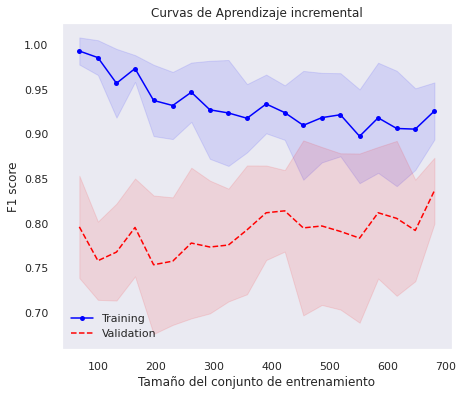

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 7


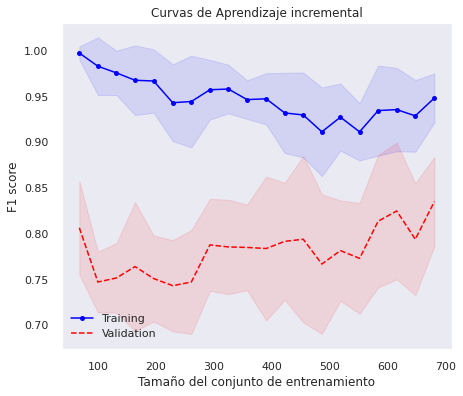

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 8


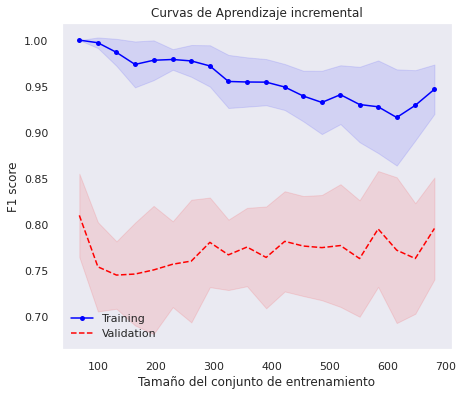

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 9


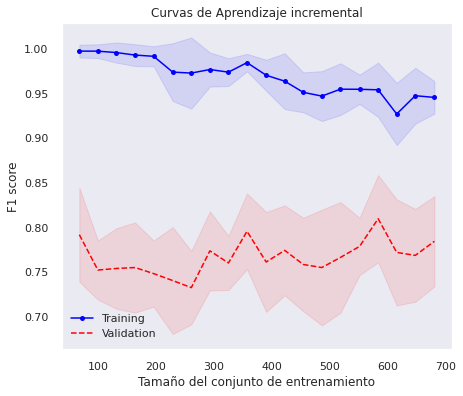

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 10


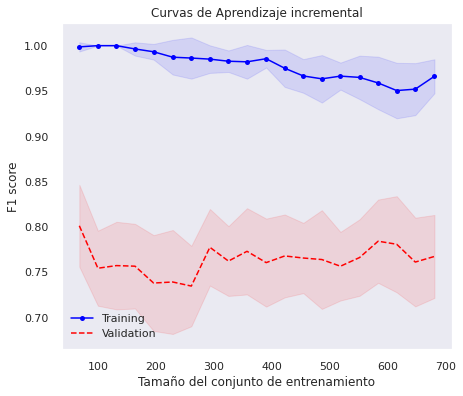

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 11


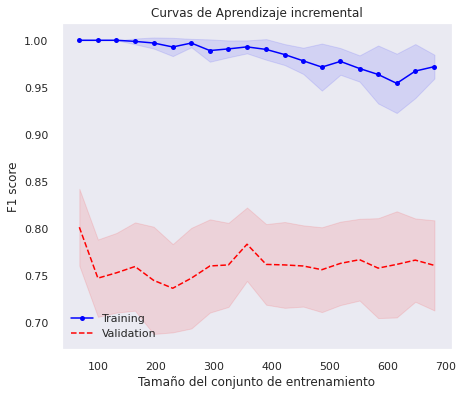

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 12


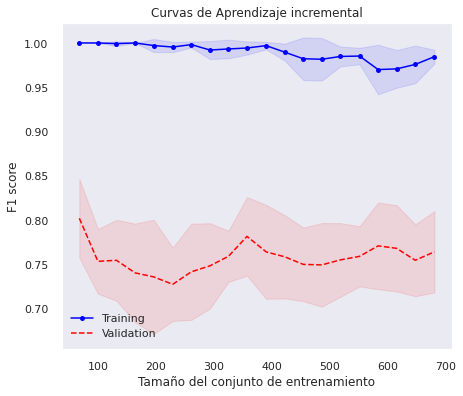

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 13


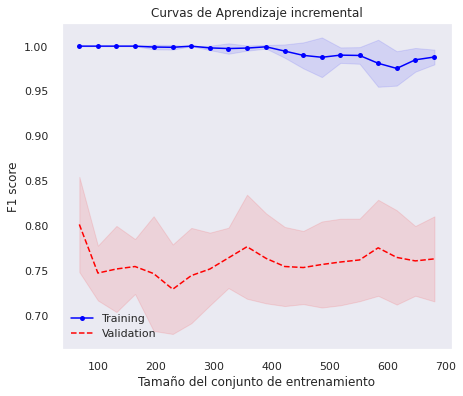

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 14


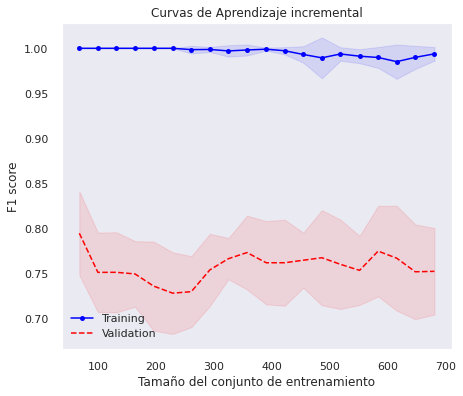

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 15


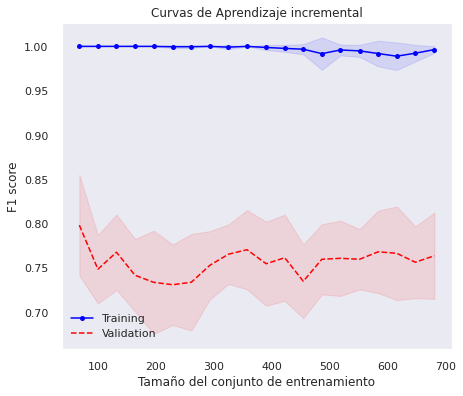

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 16


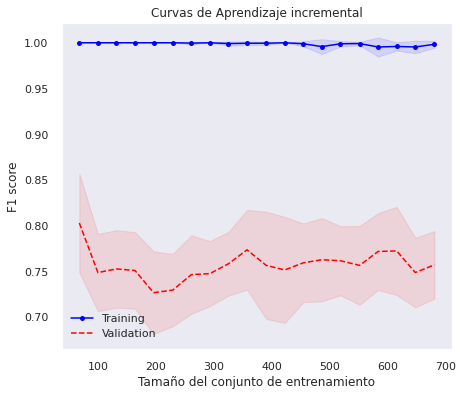

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 17


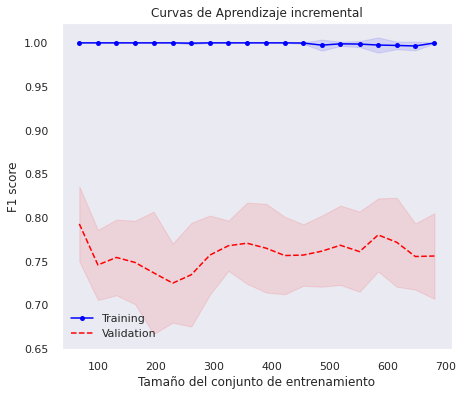

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 18


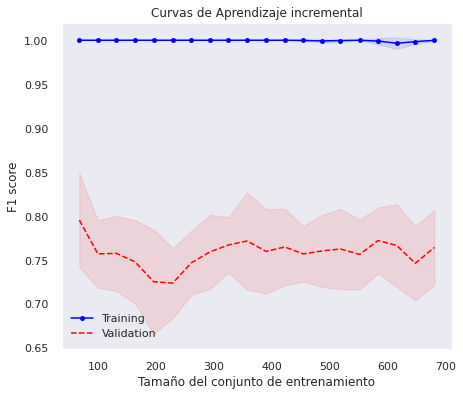

Curvas de aprendizaje del modelo DT incremental con max_depth igual a 19


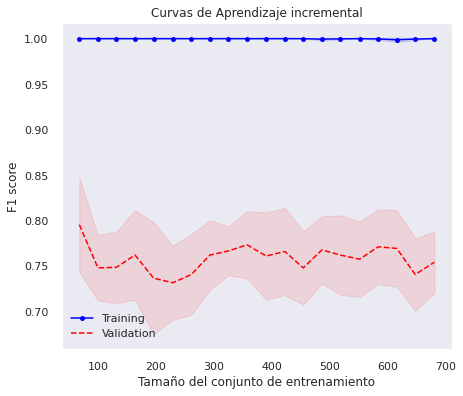

In [111]:
#Curvas de validación (validation_curve) incrementando complejidad del hiperparámetro “max_depth” para modelo de árbol de decisión.
for i in range(20):
    print('Curvas de aprendizaje del modelo DT incremental con max_depth igual a %s'%i)
    mi_CurvaAprendizaje ("DT", DecisionTreeClassifier(max_depth=i),Xtrain,Ytrain, "Incremental")

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 0


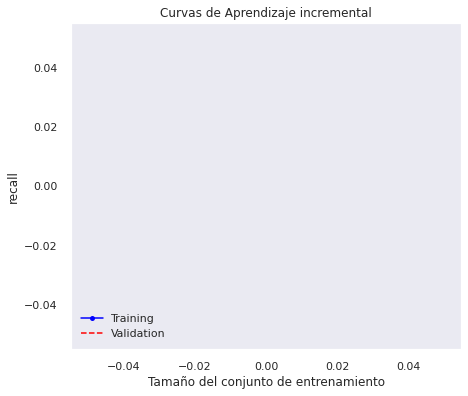

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 1


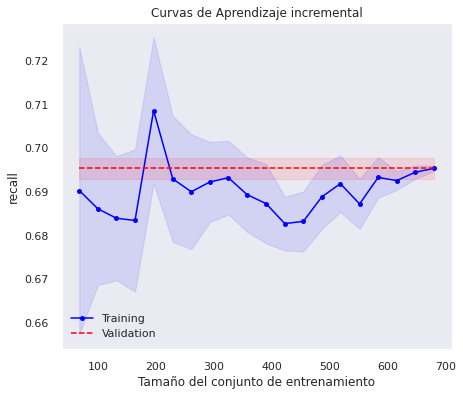

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 2


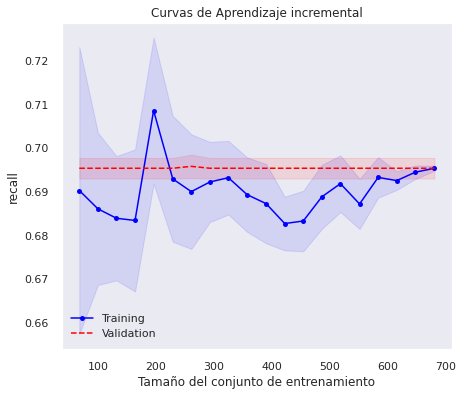

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 3


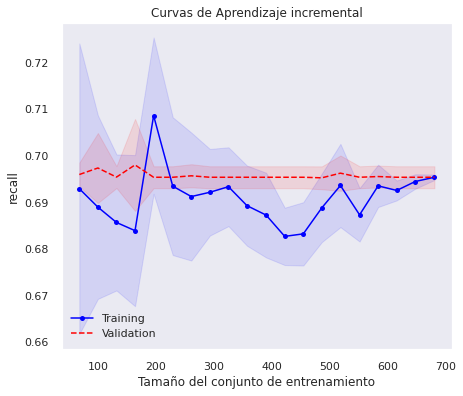

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 4


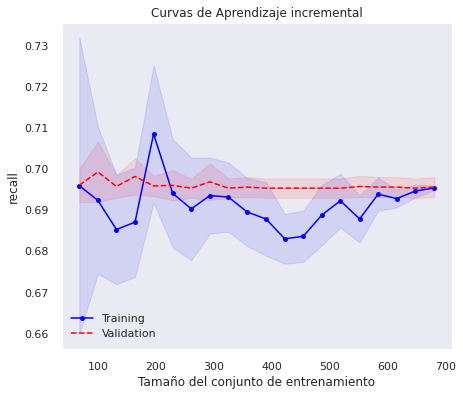

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 5


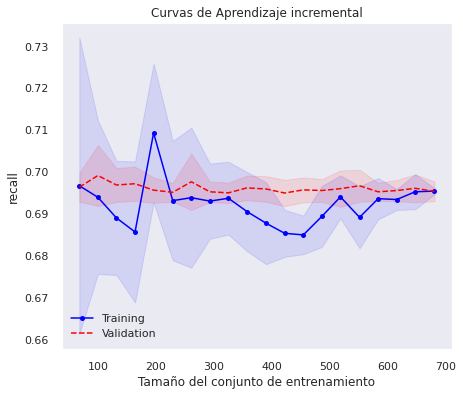

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 6


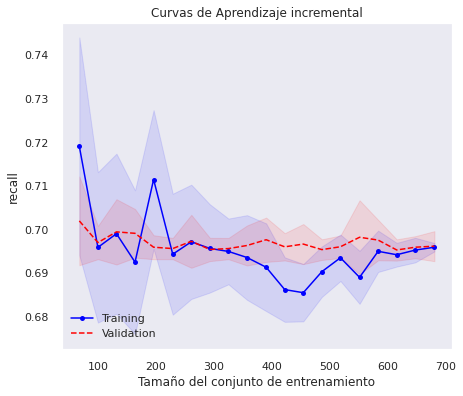

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 7


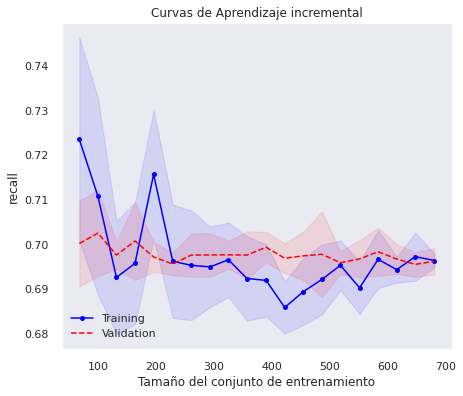

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 8


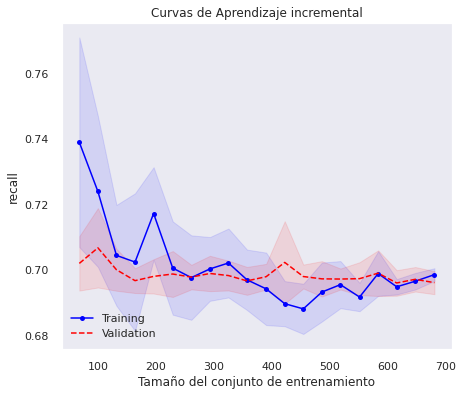

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 9


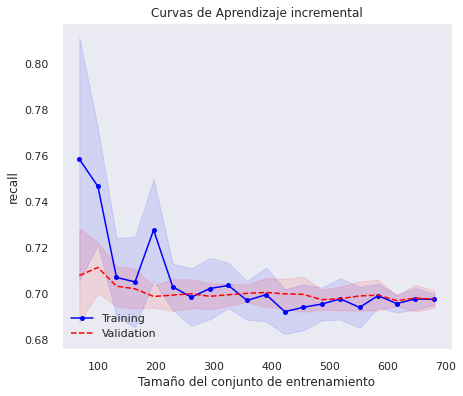

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 10


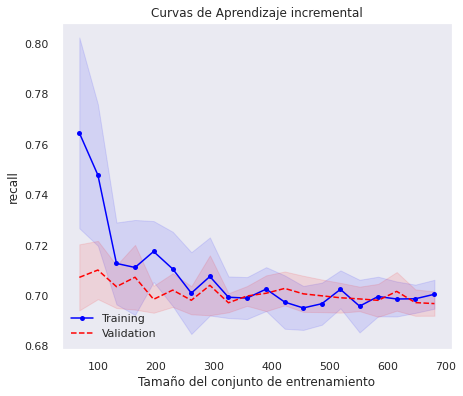

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 11


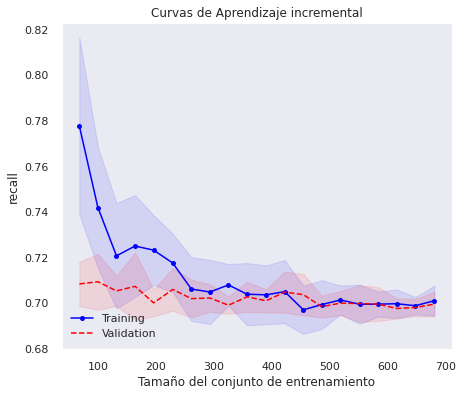

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 12


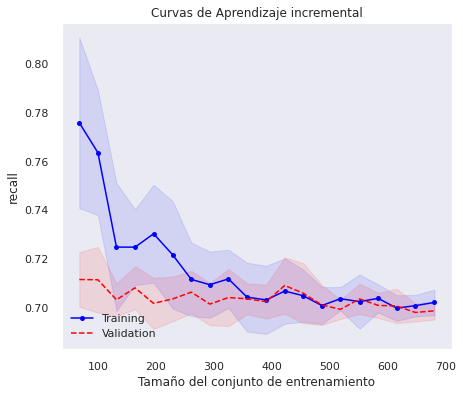

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 13


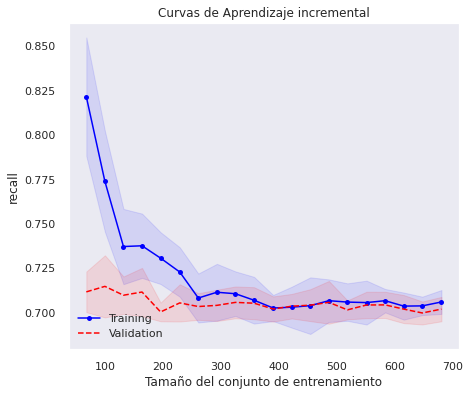

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 14


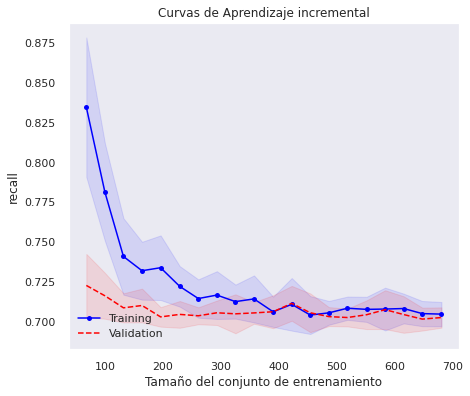

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 15


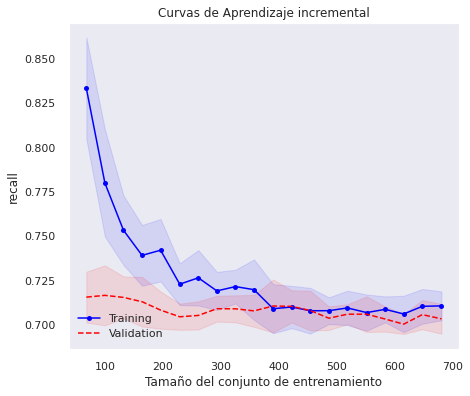

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 16


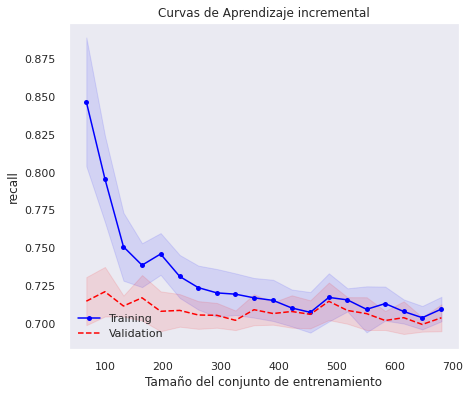

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 17


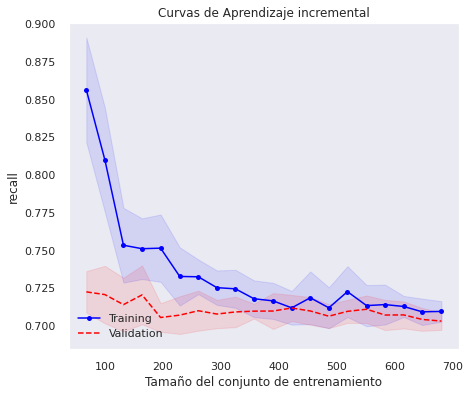

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 18


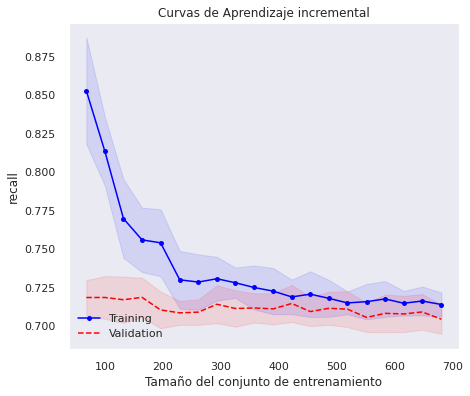

Curvas de aprendizaje del modelo RF incremental con max_samples igual a 19


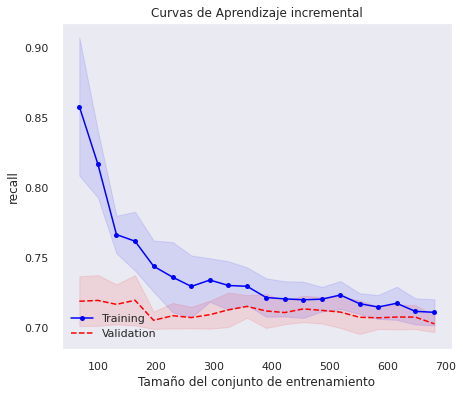

In [112]:
#Curvas de aprendizaje (learning_curve) incrementando tamaño de muestra para modelo de regresión bosque aleatorio.
for i in range(20):
    print('Curvas de aprendizaje del modelo RF incremental con max_samples igual a %s'%i)
    mi_CurvaAprendizaje ("RF", RandomForestClassifier(max_samples=i),Xtrain,Ytrain, "Incremental")

#**Ejercicio-5.**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
#*************************************************************************
#Definicion de modelos
#*************************************************************************
modelos = [LogisticRegression(penalty='l2', 
                            max_iter=10000,
                            C=100.0,
                            solver='liblinear',
			                      class_weight='balanced',
                            random_state=1), 
	        DecisionTreeClassifier(criterion='entropy', 
                            max_depth=3, 
                            min_samples_split=2,
                            #ccp_alpha=XX,
                            class_weight='balanced',
                            random_state=1),
	        RandomForestClassifier(n_estimators=10,
                                criterion='gini',
                                max_depth=2,        
                                min_samples_split = 6,
                                min_samples_leaf = 4,
                                max_features= 'auto',
                                max_leaf_nodes=16,
                                bootstrap=True,
                                oob_score=True,
                                verbose=0,
                                n_jobs=-1,
                                #ccp_alpha=XX
                                max_samples=None,
                                random_state=19,
                                class_weight='balanced'
                                )]

modelos_nombres = ["Regresion_Log", "Arbol_Decision", "Random_Forest"]

#Establecemos la variable para la validación cruzada
cv = RepeatedStratifiedKFold (n_splits=5, n_repeats=3, random_state=42)

In [ ]:
#*****************************************************************************
#Ejecución de validación cruzada obteniendo scores para los modelos definidos
#*****************************************************************************
#Recorremos los modelos definidos y la variable de validación cruzada para almacenar el score por cada modelo
#Definimos la variable 'puntajes' para almacenar el score comentado en cada iteración
puntajes = []
  
#Vamos recorriendo nuestra lista de modelos
for i in range(len(modelos)):
    
    #Creamos el pipe teniendo en cuenta las transformaciones definidas previamente en la variable 'Columnas_Transformar'
    pipeline_cv = Pipeline(steps = [
                                ('Transformaciones', Columnas_Transformar), #Nuestro transformer lo definimos arriba
                                (modelos_nombres[i], modelos[i]) 
                                ])

    #Ejecutamos la validación cruzada guardando el resultado en la variable "puntaje"
    puntaje = cross_validate(
                              estimator=pipeline_cv, X=Xtrain, y=Ytrain.values.ravel(), 
                              scoring={
                                  'f1':'f1', 
                                  'accuracy':'accuracy', 
                                  'recall': 'recall'})
  
    #Vamos alimentando la lista 'puntajes'
    puntajes.append(puntaje)
  

    #Imprimos los puntajes para cada modelo
    print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (modelos_nombres[i],
                                                                      np.mean(puntaje['test_accuracy']),
                                                                      np.std(puntaje['test_accuracy']), 
                                                                      np.mean(puntaje['test_recall']),
                                                                      np.std(puntaje['test_recall']),
                                                                      np.mean(puntaje['test_f1']),
                                                                      np.std(puntaje['test_f1']),  
                                                                      ))

In [ ]:
#*************************************************************************
#Impresión de las curvas de aprendizaje según los resultados obtenidos
#*************************************************************************
#Ahora vamos a usar nuestra función para graficar la cruva de aprendizaje para un modelo de regresión logística
#usando la misma validación cruzada (cv) que definimos arriba

for i in range(len(modelos)):
    print(f"Curva de aprendizaje para el modelo {modelos_nombres[i]}")

    #Inicialmente obtenemos las curvas a graficar
    train_sizes, train_scores, val_scores = learning_curve(
                                                            estimator=pipeline_cv, 
                                                            X = Xtrain, y = Ytrain.values.ravel(), 
                                                            train_sizes=np.linspace(0.1,1.0,30), 
                                                            cv=cv, random_state=42)
  
    #Obtenemos los promedios
    prom_train = np.mean(train_scores, axis = 1)
    prom_val = np.mean(val_scores, axis = 1)
    
    plt.figure(figsize=(8,7))
    
    #Graficaremos la curva de entrenamiento de color azul
    plt.plot(train_sizes, prom_train, color = 'blue', marker="o", label="Training", markersize="5" )
    
    #Graficaremos la curva de validación de color rojo y discontinua (--)
    plt.plot(train_sizes,prom_val, color="red", marker="+", linestyle="--", markersize="5", label="Validation")
    
    #Los títulos y otras cosas.
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    
    #En este tutorial estamos graficando accuracy, pero se puede cambiar
    #La métrica en los argumentos de la función learning_curve
    plt.ylabel('Exactitud (accuracy)')

    #Le decimos que coloque la leyenda del gráfico en la esquina inferior derecha
    plt.legend(loc='lower right')
    plt.show()

#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**